<a href="https://colab.research.google.com/github/ariabishma/learn-machinelearning/blob/main/TF%20Model%20Subclassing%20-%20Diabetes%20Prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv('./diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


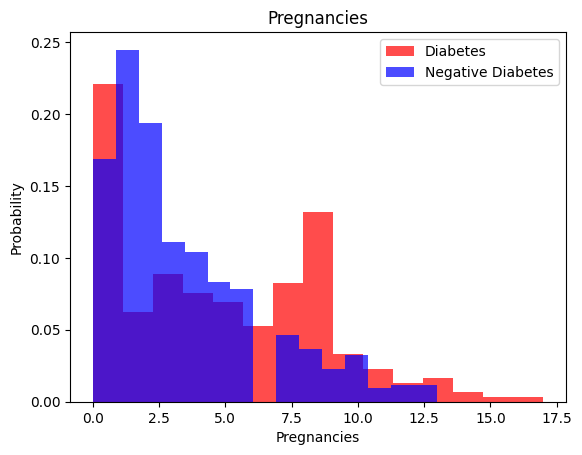

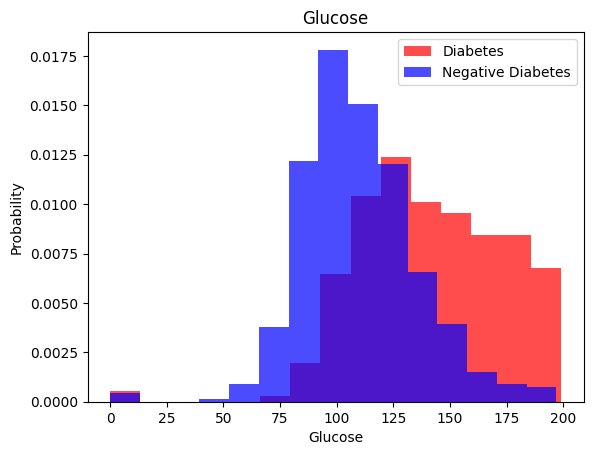

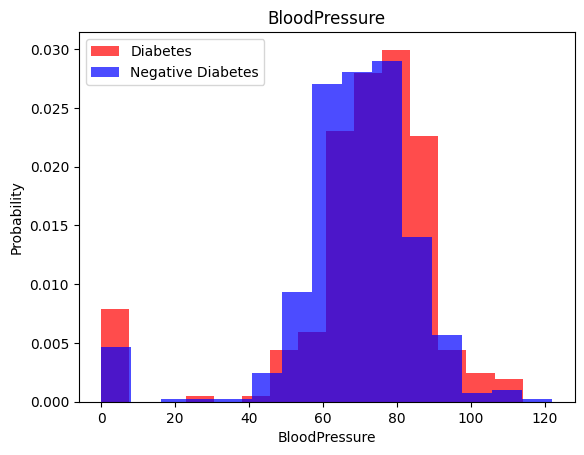

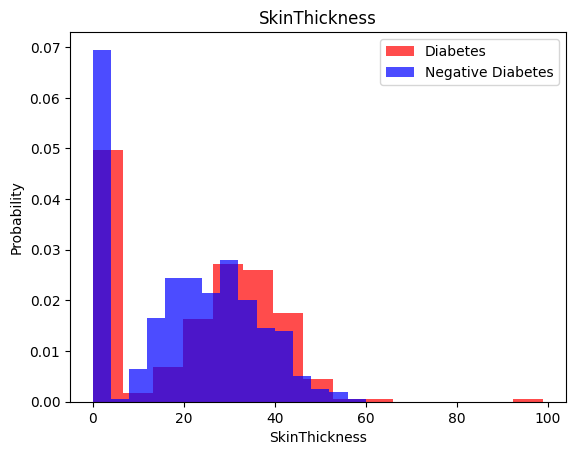

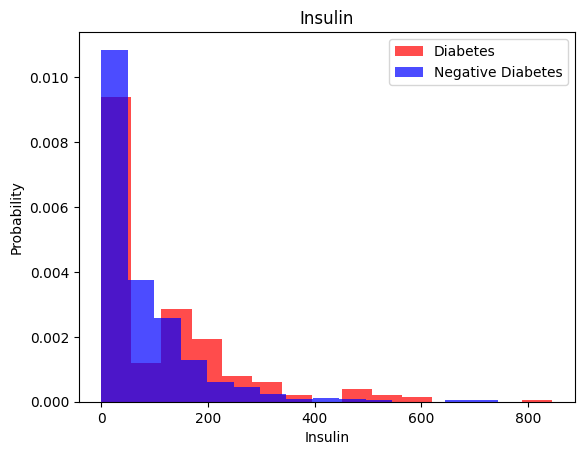

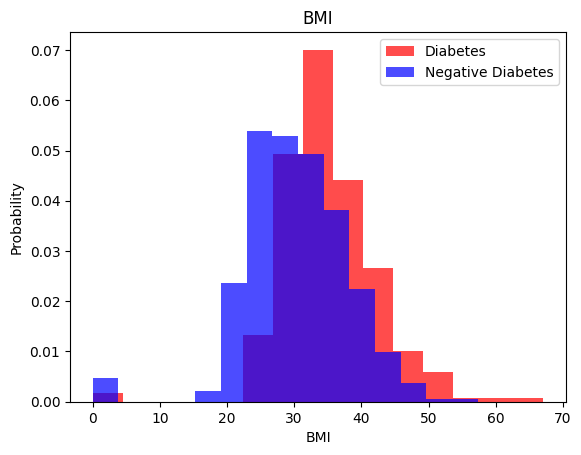

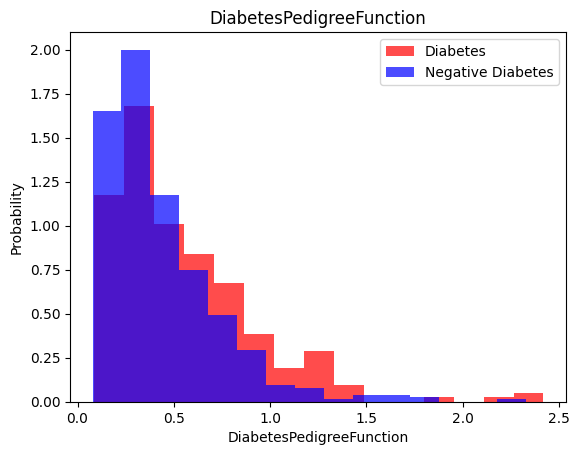

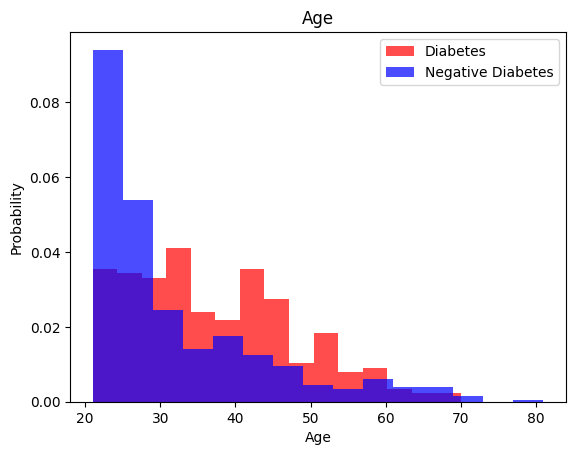

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome'] == 1][label], color='red', label="Diabetes", alpha=.7, density=True, bins=15)
  plt.hist(df[df['Outcome'] == 0][label], color='blue', label="Negative Diabetes", alpha=.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
x_train , x_temp, y_train, y_temp = train_test_split(X,y, test_size=.4, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp, test_size=.5, random_state = 0)

In [ ]:
class DiabetesPredictionModel(tf.keras.Model):
  """ Diabetes Predicition Model Subclassing """
  def __init__(self): 
    super(DiabetesPredictionModel,self).__init__()
    self.dense1 = tf.keras.layers.Dense(16, activation='relu')
    self.dropout1 = tf.keras.layers.Dropout(.2)
    self.dense2 = tf.keras.layers.Dense(16, activation='relu')
    self.dropout2 = tf.keras.layers.Dropout(.2)
    self.out_layer = tf.keras.layers.Dense(1, activation='sigmoid')
  
  def call(self,x):
    y = self.dense1(x)
    y = self.dropout1(y)
    y = self.dense2(y)
    y = self.dropout2(y)
    logits = self.out_layer(y)
    return logits

In [ ]:
model = DiabetesPredictionModel()
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7846 - accuracy: 0.3700


[0.7845557928085327, 0.3700000047683716]

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_valid,y_valid), epochs=100, batch_size=16)

Epoch 1/100
38/38 [==============================] - 1s 4ms/step - loss: 0.7432 - accuracy: 0.4867 - val_loss: 0.6801 - val_accuracy: 0.5550
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.5400 - val_loss: 0.6206 - val_accuracy: 0.6750
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.5983 - val_loss: 0.5786 - val_accuracy: 0.7350
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.6767 - val_loss: 0.5493 - val_accuracy: 0.7500
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.6767 - val_loss: 0.5262 - val_accuracy: 0.7750
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7033 - val_loss: 0.5103 - val_accuracy: 0.7800
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.5537 - accuracy: 0.7350 - val_loss: 0.4962 - val_accuracy: 0.7850
Epoch 8/100
3

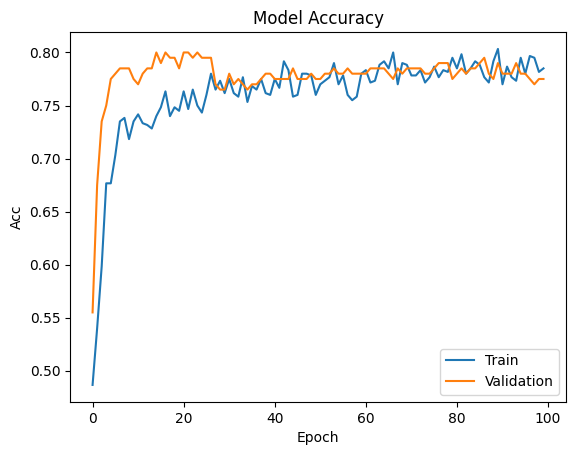

In [ ]:
plt.title('Model Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'] , label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8150


[0.4366527795791626, 0.8149999976158142]

In [ ]:
model.summary()

Model: "diabetes_prediction_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            multiple                  144       
                                                                 
 dropout_17 (Dropout)        multiple                  0         
                                                                 
 dense_96 (Dense)            multiple                  272       
                                                                 
 dropout_18 (Dropout)        multiple                  0         
                                                                 
 dense_97 (Dense)            multiple                  17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
